<a href="https://colab.research.google.com/github/Madhukargoud2197/Myntra_Online_Retail_Segmentation_Project/blob/main/Myntra_Online_Retail_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Myntra Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Burra Madhukar Goud (Individual)

# **Project Summary -**

### **Objective:**
The objective of this project was to perform Customer Segmentation using unsupervised machine learning algorithms to identify distinct groups of customers based on their buying behavior.

### **Approach:**
The Steps followed to acheive the objective of this project are as follows:

###  **Exploratory Data Analysis:**

Exploratory data analysis was performed on the dataset to understand the data distribution, perform data inspection and identify missing values, and outliers.

### **Data preprocessing:**

The dataset is then preprocessed by removing irrelevant columns, handling missing values, and scaling the features.

### **Implementing Machine Learning Models**

**K-means clustering:**

K-means clustering algorithm was implemented to group the customers into K clusters based on their buying behavior. The optimal value of K was selected using the Elbow method and Silhouette score.
In this project, it was found that the optimal number of clusters was 2.



**Hierarchical clustering:**

Hierarchical clustering algorithm was implemented to group the customers based on their similarity in buying behavior. The Dendrogram was used to select the optimal number of clusters. In this project, the optimal number of clusters was found to be 2.

**DBSCAN:**

DBSCAN clustering algorithm was implemented to group the customers based on their density of buying behavior. The optimal values of Eps and min_samples were selected using the elbow method.


**Results:**


The results of the project showed that customer segmentation using unsupervised machine learning algorithms can be a powerful tool for businesses to understand their customers' behavior and target them with appropriate marketing strategies. The project identified two distinct groups of customers based on their buying behavior and suggested appropriate marketing strategies to target each group.

**Conclusion:**


In conclusion, the project successfully implemented K-means clustering, hierarchical clustering, and DBSCAN machine learning algorithms to perform customer segmentation. The project's results demonstrate the effectiveness of unsupervised machine learning algorithms in customer segmentation, which can help businesses improve their marketing strategies and increase their sales. Additionally, the project found that there were two clusters that could effectively group the customers based on their buying behavior.


# **GitHub Link -**

# **Problem Statement**

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products.

The primary purpose of this project is to extract valuable insights to enhance Myntra Gifts Ltd.'s business strategies. Specific goals include:

1: Identifying Purchasing Trends

2: Evaluating Product Performance

3: Understanding Customer Behavior

4: Optimizing Pricing Strategies

5: Streamlining Inventory Management.


Understanding the value of each customer is crucial for any business, and to acheive the objective of this project i have utilized the RFM analysis model, which is a popular method used for this purpose. RFM stands for Recency, Frequency, and Monetary Value, and it is a technique that helps businesses to analyze their customer's value based on these three parameters.

By using RFM analysis, businesses can segment their customers into groups, based on their recency of purchase, frequency of purchase, and the monetary value of their purchases. The resulting segments can then be ordered from the most valuable customers (those with the highest recency, frequency, and value) to the least valuable customers (those with the lowest recency, frequency, and value).

Customer segmentation is the practice of dividing the customer's into groups of individuals based on common characteristics such as age, gender, interests, and spending habits. By performing customer segmentation using RFM analysis, businesses can gain a deeper understanding of their customer's value and tailor their marketing efforts and product offerings to each segment's unique needs and preferences.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

### Dataset Loading

In [2]:
# Mounting the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the Dataset
df = pd.read_excel('/content/drive/MyDrive/Myntra_Online_Retail_Customer_Segmentation_Project/Online Retail.xlsx')

### Dataset First View

In [4]:
# Top 10 rows of the Dataset
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# Checking bottom 5 rows of the dataset
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [6]:
# Finding the Rows & Columns count in the dataset
print('The number of rows in data is:', df.shape[0])
print('The number of columns in data is:', len(df.columns))

The number of rows in data is: 541909
The number of columns in data is: 8


### Dataset Information

In [7]:
# Lets get an idea about the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [10]:
#Dataset Duplicate value count
duplicate_row_count = df.duplicated().sum()
print('The number of duplicate rows in data is:', duplicate_row_count)

The number of duplicate rows in data is: 5268


#### Missing Values/Null Values

In [11]:
# Lets find the missing value/Null value count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [12]:
missing_percentage= (df.isnull().mean() * 100, 2)
print(missing_percentage)

(InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64, 2)


<Axes: >

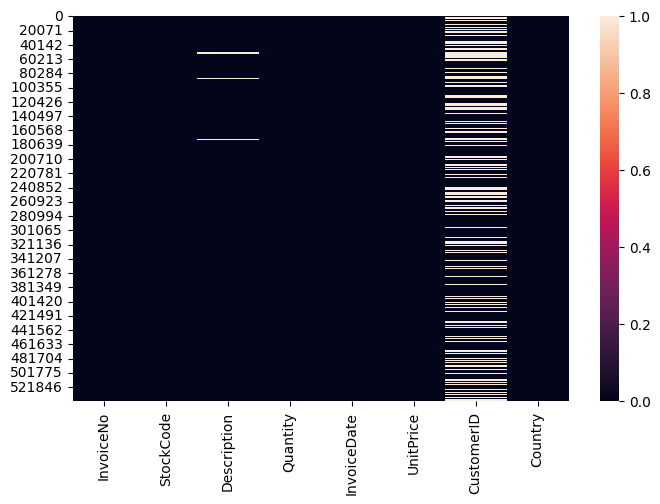

In [13]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

####Observation:
From the above we can see that 24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset going further as they cant add any insights to the data.

### What did you know about your dataset?

1: The dataset contains all the transactions from December 1, 2009, to December 9, 2011 and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform.


2: The company mainly sells unique all-occassion gifts.

3: Many customers of the company are wholesalers.

4: The dataset contains 541909 rows and 8 columns.

5: There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.

6: The total number of duplicated values in the dataset: 5268

Missing Data Percentage
CustomerID - 24.93%
Description - 0.27%

## ***2. Understanding Your Variables***

In [14]:
# Lets have a look at our columns
columns_ = print(list(df.columns))

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [15]:
# Statistical summary of the dataset
numeric_df = df.select_dtypes(include=np.number)
print(numeric_df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


### Variables Description

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [16]:
# Checking for Unique Values for each variable.
for i in df.columns :
  print("Number of unique values in",i,"is", df[i].nunique())

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


## 3. ***Data Wrangling***

In [17]:
# Checking the customerid which are not unique
df.CustomerID.count()
print(f" Total non unique customers are {df.CustomerID.count()}")

 Total non unique customers are 406829


In [18]:
# Checking number of unique customer id
len(df['CustomerID'].value_counts())

4372

In [19]:
# Checking customer with respect to the country
cust_count =pd.DataFrame(df.groupby(['Country'])['CustomerID'].value_counts(ascending=False))
cust_count

count
Country        CustomerID       
Australia      12415.0       778
               12431.0       186
               12388.0       100
               12393.0        64
               12434.0        54
...                          ...
United Kingdom 18233.0         1
Unspecified    12743.0       134
               16320.0        56
               14265.0        31
               12363.0        23

[4380 rows x 1 columns]

In [20]:
# Checking number of unique customers with respect to the country
cust_count =pd.DataFrame(df.groupby(['Country'])['CustomerID'].nunique())
cust_count

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


Here we can see that number of unique customer are maximum in United Kingdom.

In [21]:
# Checking Top country
country_count=df['Country'].value_counts().reset_index()
country_count.rename(columns={'index': 'Country_Name'}, inplace=True)
country_count.rename(columns={'Country': 'Count'}, inplace=True)
country_count.head()

,Count,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [22]:
# Checking for the last and first dates from the invoicedate
print("Minimum Invoice Date", min(df["InvoiceDate"]))
print("Maximum Invoice Date", max(df["InvoiceDate"]))

Minimum Invoice Date 2010-12-01 08:26:00
Maximum Invoice Date 2011-12-09 12:50:00


In [23]:
# Checking details of the unit price of the product
df['UnitPrice'].describe()

,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [24]:
# Checking for any negative prices as the min value is found to be having negative value
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Here we can see that there are only two rows which are having a negative unit price with Adjust bad debt as decription. Hence removing these values.

In [25]:
# Removing these negative unit price values
df = df[df['UnitPrice'] >= 0]

In [26]:
#Checking if all the negative values are removed
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [27]:
# Lets check for unitprice equal to zero
df[df.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [28]:
# Lets find what percentage of these values are priced zero
print("The percentage of data with Price Zero is:" , round(len(df[df.UnitPrice == 0]) * 100/len(df),2), "%")

The percentage of data with Price Zero is: 0.46 %


In [29]:
# Lets find the number of customer ids associated with unitprice zero
print(" Total customer id with unit price zero are:", df[df.UnitPrice == 0].CustomerID.nunique())

 Total customer id with unit price zero are: 31


In [30]:
# As the count is less and the percentage is less, lets remove these values
df = df[df.UnitPrice > 0]
df["UnitPrice"].describe()

,UnitPrice
count,539392.000000
mean,4.673648
std,94.614722
min,0.001000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [31]:
# Lets check for the Quanting feature information
df['Quantity'].describe()

,Quantity
count,539392.000000
mean,9.845904
std,215.412652
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [32]:
# As we have negative value for the minimum, lets check for the negative quantity values
df[df.Quantity <= 0].value_counts()

InvoiceNo  StockCode  Description                         Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
C543611    82483      WOOD 2 DRAWER CABINET WHITE FINISH  -1        2011-02-10 14:38:00  4.95       17850.0     United Kingdom    4
C538341    22730      ALARM CLOCK BAKELIKE IVORY          -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
           22725      ALARM CLOCK BAKELIKE CHOCOLATE      -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    3
           22976      CIRCUS PARADE CHILDRENS EGG CUP     -12       2010-12-10 14:03:00  1.25       15514.0     United Kingdom    3
           22727      ALARM CLOCK BAKELIKE RED            -2        2010-12-10 14:03:00  3.75       15514.0     United Kingdom    2
                                                                                                                                 ..
C551464    22745      POPPY'S PLAYHOUSE BEDROOM           -6        2011-04-28 16:15:00  2.10       13085.0     United Kingdom    1
           22746      POPPY'S PLAYHOUSE LIVINGROOM        -6        2011-04-28 16:15:00  2.10       13085.0     United Kingdom    1
           22748      POPPY'S PLAYHOUSE KITCHEN           -6        2011-04-28 16:15:00  2.10       13085.0     United Kingdom    1
C551465    21714      CITRONELLA CANDLE GARDEN POT        -3        2011-04-28 16:17:00  1.25       14640.0     United Kingdom    1
C551463    23152      IVORY SWEETHEART WIRE LETTER RACK   -2        2011-04-28 16:13:00  3.75       13534.0     United Kingdom    1
Name: count, Length: 8872, dtype: int64

In [33]:
# Lets understand and check for sum of orders that are cancelled and ordered.
cancelled_orders = df[df.Quantity <= 0]['Quantity'].sum()
Processed_orders = df[df.Quantity > 0]['Quantity'].sum()
print("Total Cancelled Orders:", cancelled_orders)
print("Total Processed Orders:", Processed_orders)

Total Cancelled Orders: -277574
Total Processed Orders: 5588376


In [34]:
# Total valuecount of the orders cancelled
len(df[df.Quantity <= 0])

9288

In [35]:
# Lets check the cancelled orders countrywise as there are huge number of cancelled orders
cancelled_orders_country = df[df.Quantity <= 0]['Country'].value_counts()
cancelled_orders_country

,count
Country,
United Kingdom,7856
Germany,453
EIRE,302
France,149
USA,112
Australia,74
Spain,48
Italy,45
Belgium,38


In [36]:
#Checking top 5 products peoples are buying repeatedly
Product_count= df['Description'].value_counts().reset_index()
Product_count.rename(columns={'index': 'Product_Description'}, inplace=False)
Product_count.rename(columns={'Description': 'Count'}, inplace=False)
# Top 5 products being purchased
Product_count.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2365
1,REGENCY CAKESTAND 3 TIER,2198
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1726
4,LUNCH BAG RED RETROSPOT,1638


In [37]:
# Now lets check the products people are cancelling repeatedly
Cancelled_count= df[df.Quantity <= 0]['Description'].value_counts().reset_index()
# Top 5 products being cancelled
Cancelled_count.head()

,Description,count
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77


In [38]:
# Lets check for Top Stock codes
Top_selling_codes = pd.DataFrame(df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False))
Top_selling_codes.head(5)

,StockCode,Quantity
1037,22197,56450
2568,84077,53847
3542,85099B,47359
2673,84879,36381
365,21212,36039


In [39]:
# Now Lets convert the Invoice date column into a datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

In [40]:
# Lets Create new columns for day, month, year and time
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour

In [41]:
# Lets Verify the years
df['Year'].unique()

array([2010, 2011], dtype=int32)

In [42]:
#Lets find the Sales quantity for each month so we can understand the purchases monthly
month_sale=pd.DataFrame(df.groupby(['Year','Month'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
month_sale

,Year,Month,Quantity
10,2011,November,741886
11,2011,October,598860
12,2011,September,563391
2,2011,August,409424
6,2011,July,395731
9,2011,May,389870
7,2011,June,381851
8,2011,March,372131
0,2010,December,343197
5,2011,January,307940


In [43]:
# Lets understand the products prices and look for maximum priced product
max_priced_products = pd.DataFrame(df.groupby(['Description'])['UnitPrice'].max().reset_index().sort_values(by="UnitPrice" ,ascending=False ))

In [44]:
# Lets understand the maximum priced product
max_priced_products[['Description', 'UnitPrice']].head(5)

,Description,UnitPrice
2201,Manual,38970.00
155,AMAZON FEE,17836.46
265,Adjust bad debt,11062.06
2703,POSTAGE,8142.75
1074,DOTCOM POSTAGE,4505.17


In [45]:
# Lets now understand the least priced products
min_priced_products = pd.DataFrame(df.groupby(['Description'])['UnitPrice'].min().reset_index().sort_values(by="UnitPrice" ,ascending=True ))

In [46]:
min_priced_products[['Description', 'UnitPrice']].head(5)

,Description,UnitPrice
595,Bank Charges,0.001
2352,PADS TO MATCH ALL CUSHIONS,0.001
1098,Discount,0.010
2964,ROTATING SILVER ANGELS T-LIGHT HLDR,0.030
2201,Manual,0.030


In [47]:
# Lets understand in what time of a day the sales are high and low, Firstly lets create a copy of dataset
df1 = df.copy()


In [48]:
# Classifying the day into shift formats
from datetime import time
df1['part_of_day'] = df['Time'].apply(lambda x: 'Morning' if time(6, 0, 0) <= x < time(12, 0, 0) else ('Afternoon' if time(12, 0, 0) <= x < time(18, 0, 0) else 'Evening'))

In [49]:
quantity_part_of_day = pd.DataFrame(df1.groupby(['part_of_day'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ))
quantity_part_of_day

,part_of_day,Quantity
0,Afternoon,3222130
2,Morning,1983666
1,Evening,105006


We can see from this that the purchases or orders are mostly from the afternoon followed by morning and quite less in the Evening.

### What all manipulations have you done and insights you found?

From the Data Wrangling we observed that:

* There are only 4372 unique customer id.
* Unique customers are maximum in the United Kingdom around 3950
*  Observed the rows with negative unit price and unit price equal to zero and handled them
* Total ordered quantity and total cancelled quantity are 5588376 and -277574 respectively.
* Observed the countries with most orders,  cancelled orders and total quantity ordered.
* Understood the top purchased products
* Found the products that are mostly cancelled frequently
* The 'Manual' with 38970.00 per unit and the 'Amazon Fee' with 17836.0 per unit are the top costlier products
* The 'Pads to Match Cushions' are the cheapest priced product by quantity ordered.
* The net quantity ordered are maximum in the Afternoon, followed by Morning and Evening.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#### Bar plot for Top five customers who ordered maximum qunatity

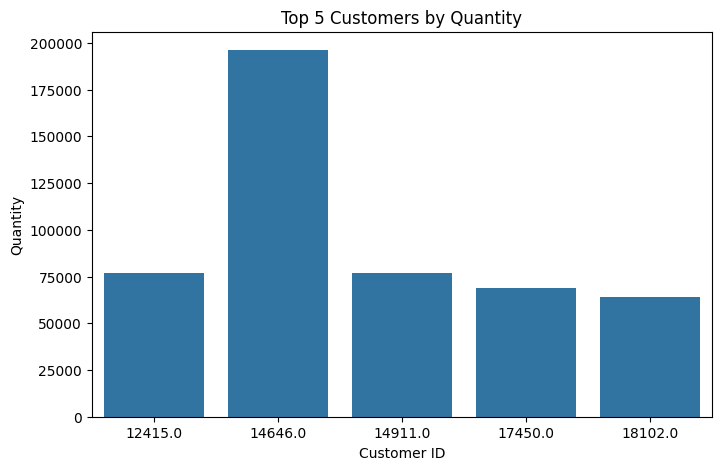

In [50]:
Top_customers = df.groupby(['CustomerID'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)

# Creating a bar plot
sns.barplot(x='CustomerID', y='Quantity', data=Top_customers.head(5))
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('Top 5 Customers by Quantity')
plt.show()

##### 1. Why did you pick the specific chart?

Here i have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories

##### 2. What is/are the insight(s) found from the chart?

Here i have the top 5 customer id's who are ordering maximum quantity.The customer ID 14646 has ordered maximum quantity.

##### 3. Will the gained insights help creating a positive business impact?


Are there any insights that lead to negative growth? Justify with specific reason.


Yes, this insights are very helpful in positive business growth because by this the retailer will get an knowledge which cusstomer is ordering most of the Quantity.

#### Chart - 2

#### Bar plot for Top five products that are being ordered by the customers

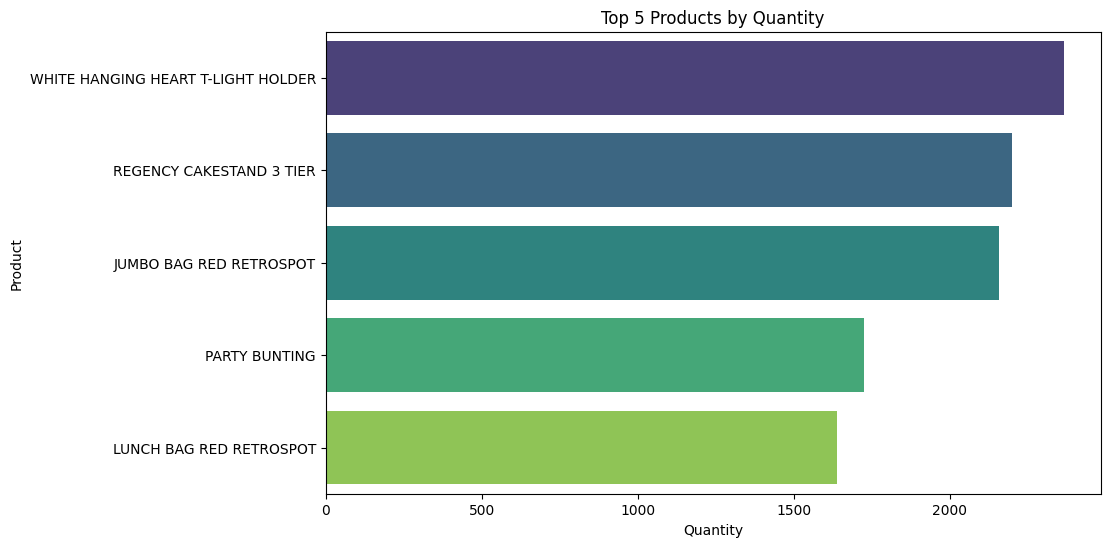

In [51]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.title('Top 5 Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product')
sns.barplot(x='count', y='Description', data=Product_count[:5], palette='viridis')
plt.show()

##### 1. Why did you pick the specific chart?

Here i have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here i can see that top 5 products the customers are ordering repeatedly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are very helpful in positive business growth because it helps the retailer to manage the stock of the product which is in high demand.

#### Chart - 3

#### Bar plot of top 5 product people are cancelling repeatedly.

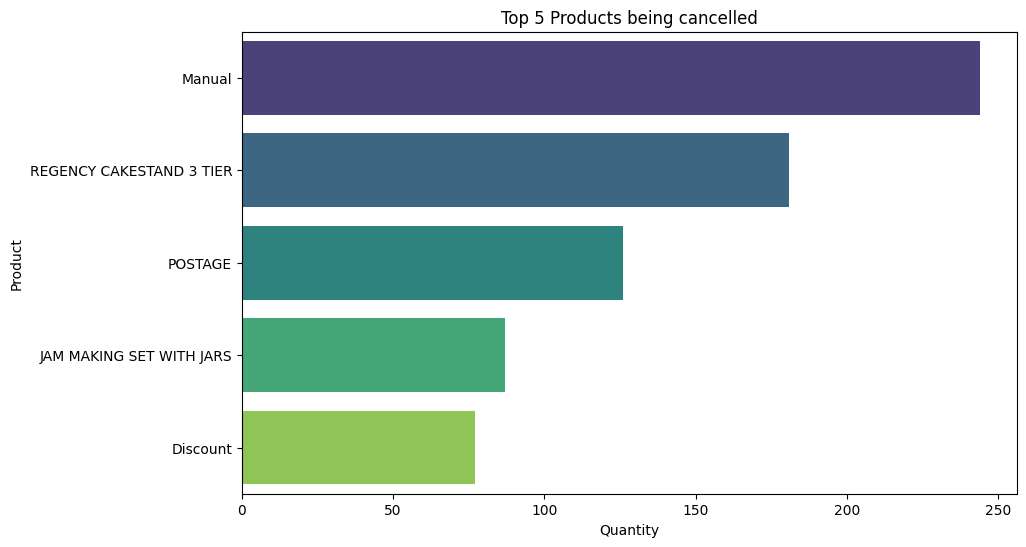

In [52]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.title('Top 5 Products being cancelled')
plt.xlabel('Quantity')
plt.ylabel('Product')
sns.barplot(x='count', y='Description', data=Cancelled_count[:5], palette='viridis')
plt.show()

##### 1. Why did you pick the specific chart?

Here i have used bar plot because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here i have observed and presented the top 5 products the customers are cancelling repeatedly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights lead to positive business growth because the retailer will know which products the customers are canceling repeatedly and which are in least demand, and on the basis of that, he can manage the particular products on the website.

#### Chart - 4

#### Bar plot of top 5 stock code are in high demand

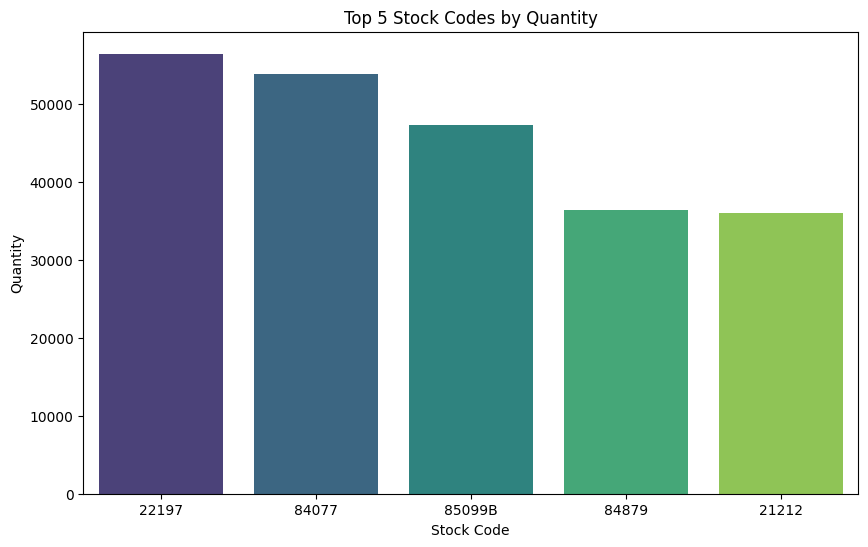

In [53]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.title('Top 5 Stock Codes by Quantity')
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
sns.barplot(x='StockCode', y='Quantity', data=Top_selling_codes[:5], palette='viridis')
plt.show()

##### 1. Why did you pick the specific chart?

Here bar plot is used because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here the top 5 stock codes which are in high demand can be observed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights are very helpful in maintaing the stock of the retailer so it leads to posititve business growth.

#### Chart - 5

#### Bar plot for total orders placed in the year 2010 and 2011 in each month

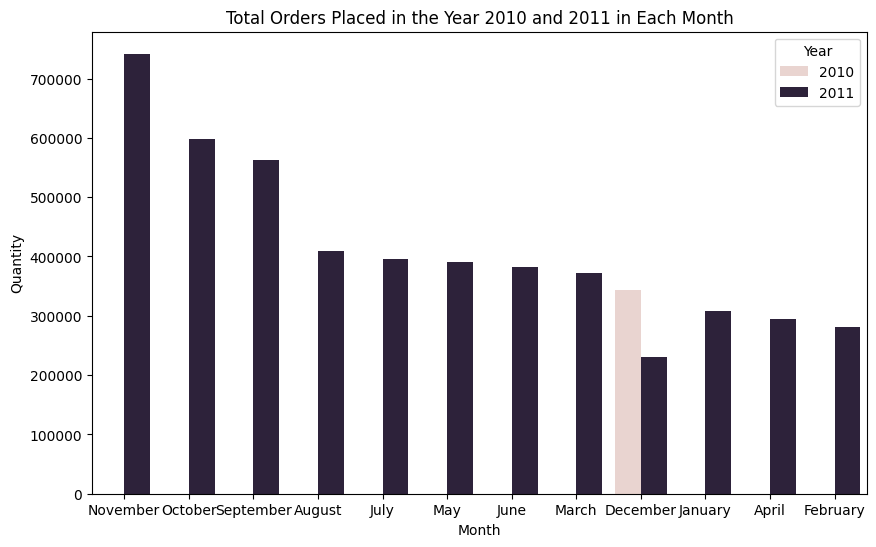

In [54]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Quantity', hue='Year', data=month_sale)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Total Orders Placed in the Year 2010 and 2011 in Each Month')
plt.show()

##### 1. Why did you pick the specific chart?

Here i have used bar plots because bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

Here by seeing the above plot we can see that in the year 2010 we have only the orders that are placed in the month of december while in 2011 the quantity is ordered almost every month of the year.In 2011 the maximum quantity is ordered in the month of November and minimum quantity is ordered in the month of December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights leads to positive business growth because it helps the retailer in which month demand of quantity is high and on the basis of that he can manage the future stock of the product so that he cannot run out of stock.

#### Chart - 6

#### Bar plot for the busiest Day of the Week (Bivariate)

<Axes: title={'center': 'Sales for each day of the Week'}, xlabel='Day', ylabel='Customers'>

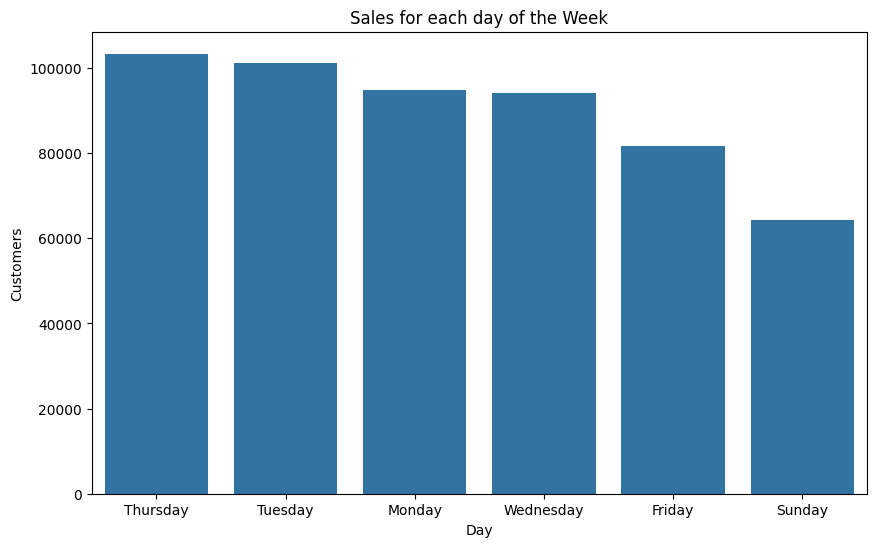

In [55]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.title('Sales for each day of the Week')
plt.xlabel('Day')
plt.ylabel('Customers')
sns.barplot(x='Day', y='Quantity', data=df.groupby(['Day'])['Quantity'].count().reset_index().sort_values('Quantity', ascending=False))

##### 1. Why did you pick the specific chart?

Here a bar plot is used, as the bar plots helps to compare the values of one or more numerical variables across different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can say that the stores are getting high traffic on Thursday followed by Tuesday, and least traffic on Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will definitely help to create positive impact as it helps the retailer to understand the busiest days of the weeks and plan accordingly.

#### Chart - 7

#### Bar plot for the busiest month of the Year (Bivariate)

<Axes: title={'center': 'Sales for each month of the Year'}, xlabel='Month', ylabel='Customers'>

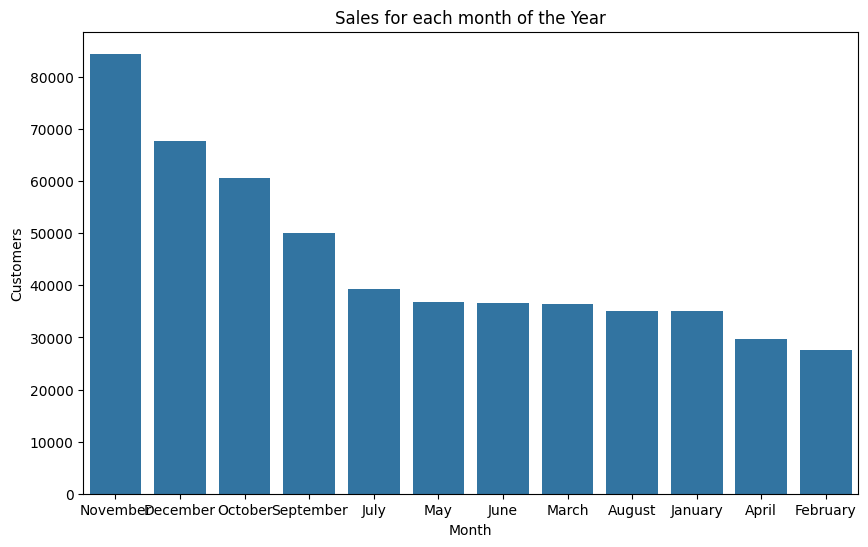

In [56]:
# Plotting the bar plot for busiest month of the year
plt.figure(figsize=(10, 6))
plt.title('Sales for each month of the Year')
plt.xlabel('Month')
plt.ylabel('Customers')
sns.barplot(x='Month', y='Quantity', data=df.groupby(['Month'])['Quantity'].count().reset_index().sort_values('Quantity', ascending=False))

##### 1. Why did you pick the specific chart?

Here i have used bar plot to compare the total number of orders being placed by the customer through which we can understand the busiest month in the year.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the busiest month is November, followed by december and least busiest month is February.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will lead us in creating positive business impact as the retailer can attract customers with special offers.

#### Chart - 8

#### Line Maker plot For the quantities sold with respect to the InvoiceDate (Bivariate)

In [57]:
# Plotting a line marker plot
import plotly.graph_objs as go
plt = go.Figure()
date_wise_sales = df[(df['Quantity']> 0) & (df['Quantity'] < 40000)].groupby('InvoiceDate')['Quantity'].sum().reset_index()
plt.add_trace(go.Scatter(x=date_wise_sales['InvoiceDate'], y=date_wise_sales['Quantity'], mode='lines+markers'))
plt.show()

##### 1. Why did you pick the specific chart?

Here i have used Line Maker plot to see the sales on each each day of the month through which we can understand and compare the sales of an month each day by which we can understand the trend of purchases.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that maximum quantity is ordered on June 15 2011 around the purchases are 15.241K.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights are very helpful for positive business growth because they give very detailed information on the demand for quantity on each date, and based on that, the retailer can make certain decisions and maximize profits.

#### Chart - 9

#### Bar plot for the most Frequent Customers (Bivariate)

Text(0, 0.5, 'Number of Unique Invoices')

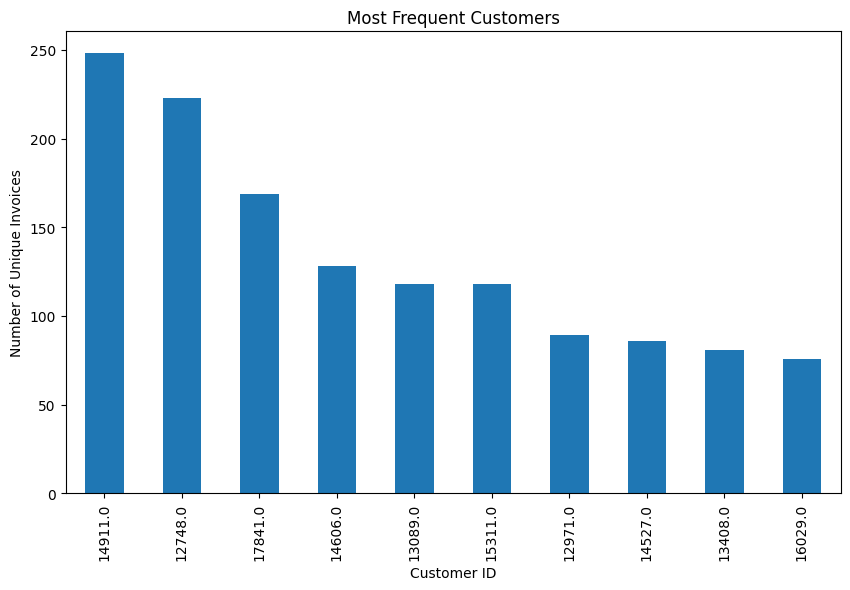

In [58]:
# Plotting the bar plot for most frequent customers using the customer id and number of uniqe Invoice number.
import matplotlib.pyplot as plt
import seaborn as sns
frequent_customers = df.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
frequent_customers.head(10).plot(kind='bar')
plt.title('Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Unique Invoices')

##### 1. Why did you pick the specific chart?

Here i have used bar plot to find the most frequent customers .

##### 2. What is/are the insight(s) found from the chart?

We found out that the most frequent customer is the customer with customer id 14911 followed by 12748.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above bar plot will help us recognize the valued customers. And this will help us create a positive business impact.

#### Chart - 10

#### Bar plot for top 5 Countries with highest number of Quantities Purchased(Bivariate)

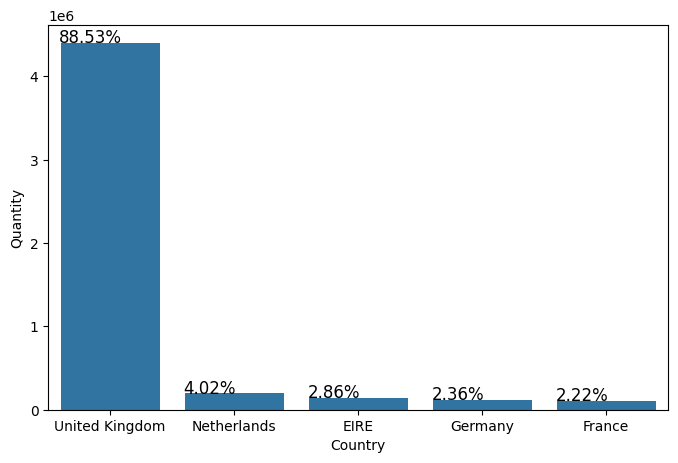

In [59]:
# Plotting a bar plot for top countries with most number of purchases
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5).reset_index()
ax = sns.barplot(x='Country', y='Quantity', data=top_countries)

# Lets get percentages on the top of the bars
totals = []
for i in ax.patches :
  totals.append(i.get_height())
  total = sum(totals)
for i in ax.patches :
  ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)* 100, 2)) + '%', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

I have used this bar plot to find out the countries which has higher purchasing power.

##### 2. What is/are the insight(s) found from the chart?

As per the gained insight, United Kingdom has the highest purchasing power followed by Netherlands in the given stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As per the above insights, we can work on increasing the number of stores in countries where selling is comparatively less. And it will help us to create the positive business impact.

#### Chart - 11

#### Plot for understanding the busiest hours with respect to the Quantities Sold


<Axes: xlabel='Hour', ylabel='Quantity'>

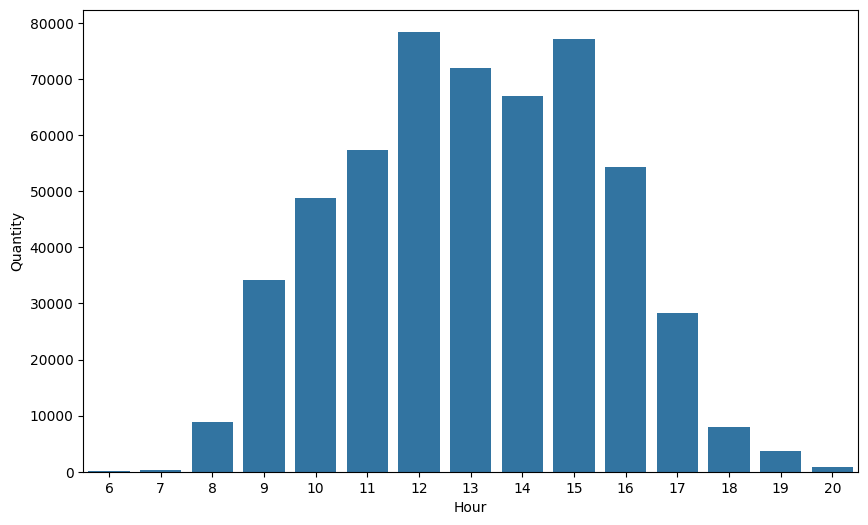

In [60]:
# Plotting the visualization for the busiest hours with respect to the quantities sold
busiest_hours = df.groupby('Hour')['Quantity'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Quantity', data=busiest_hours)

##### 1. Why did you pick the specific chart?

Here i have used bar plot to compare the sales for each hour of the day.

##### 2. What is/are the insight(s) found from the chart?

From the plot we can say that the busiest hours ranges from 10:00 AM to 4:00 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight help us to identify the busiest hours, and we can arrange for the man power and products accordingly.

#### Chart - 12

#### Distribution Plot for understanding the skewness in the data.

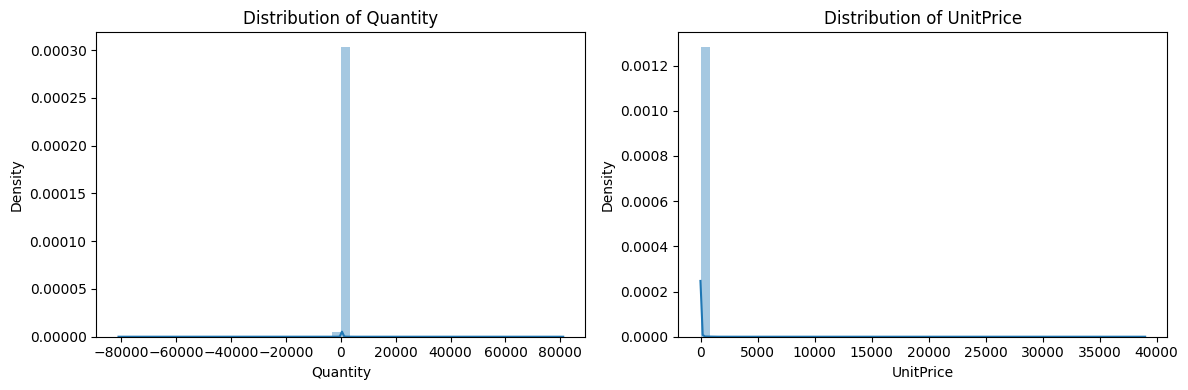

In [61]:
# Plotting distribution charts for quantity and unitprice
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['Quantity', 'UnitPrice']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, column in enumerate(columns_to_plot):
  sns.distplot(df[column].dropna(), ax=axes[i], kde=True)
  axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I have used this chart to check the skewness in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The quantity column is both positively and negatively skewed in the data. Whereas, the UnitPrice column indicates an highly positive skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart shows there is high number of canceled items in our dataset. So, we can investigate the causes of high number of cancellations. And this will help to create a positive business impact.

#### Chart - 13

#### Line plot to show variaton in the ordered quantity and cancelled quantity across each month of year 2011 (Multivariate).

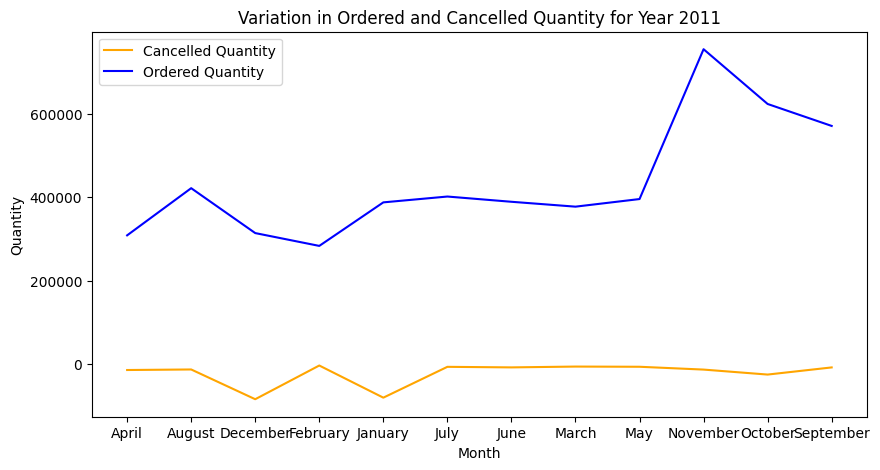

In [62]:
# Plottig line plot to understand the variation in the ordered quantity and cancelled quantity for the year 2011
cancelled_q = pd.DataFrame(df1[df1.Quantity <= 0])
ordered_q = pd.DataFrame(df1[df1.Quantity > 0])
cancelled_quantity = cancelled_q[cancelled_q['Year']== 2011].groupby('Month')['Quantity'].sum().reset_index()
ordered_quantity = ordered_q[ordered_q['Year']== 2011].groupby('Month')['Quantity'].sum().reset_index()

#Visualizing the plot
plt.figure(figsize=(10, 5))
plt.plot(cancelled_quantity['Month'], cancelled_quantity['Quantity'], label='Cancelled Quantity', color='orange')
plt.plot(ordered_quantity['Month'], ordered_quantity['Quantity'], label='Ordered Quantity', color='blue')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Variation in Ordered and Cancelled Quantity for Year 2011')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?


Here i have used Line plot to show variation in the ordered quantity and canelled quantity across each month of the year 2011.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is observed that
* The Cancelled quantity is low in the month of december and january when compared to the other months.
* The ordered quantity is high in the month of November and it has decreased in the month of february when compared to the other months.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this insights leads to positive business growth because it helps the retailer to analyze the ordered and cancelled quantity and on the basis of that he can manage the stock so that the retailer does not run out of stock.

#### Chart - 14

#### Correlation Heatmap

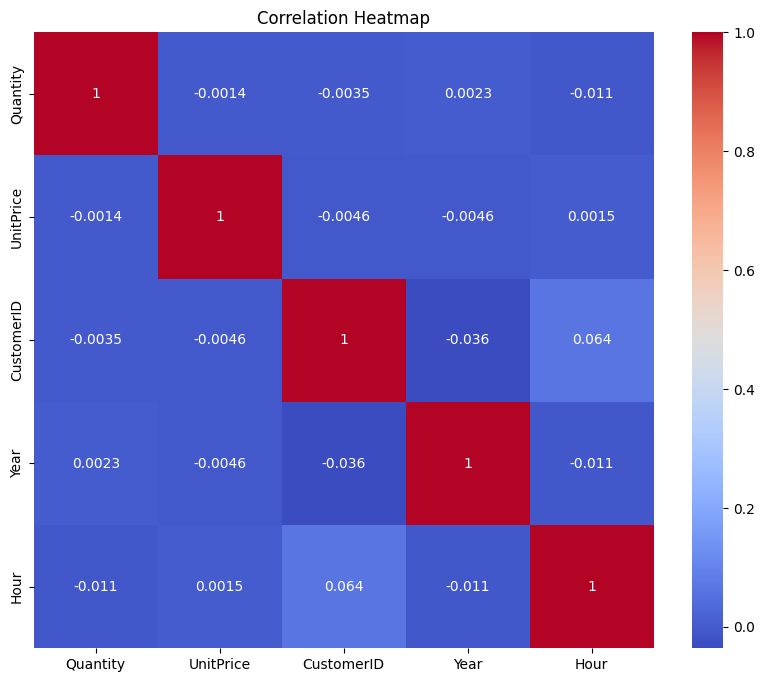

In [66]:
# Plotting correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To find the correlation between the numerical features.

##### 2. What is/are the insight(s) found from the chart?

As we know that 1 denotes an high positive correlation, and -1 shows high negative correlation.

From the above heatmap, we can say that the features are independent to each other.

#### Chart - 15

#### Pair Plot

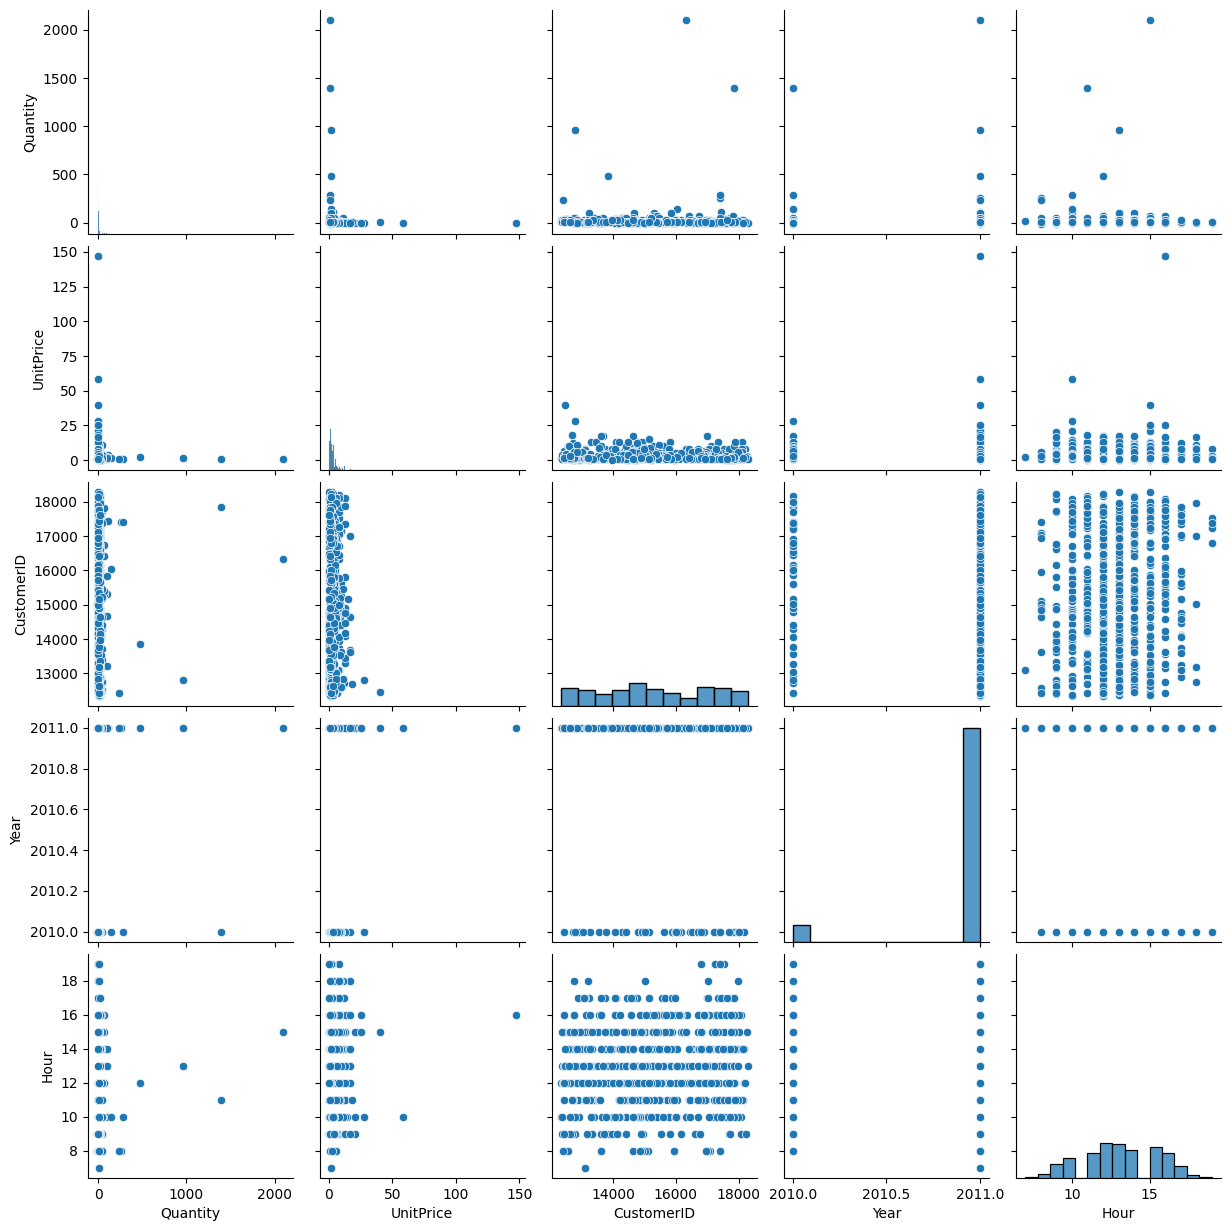

In [67]:
# Creating an sample from the dataset and plotting an pair plot
sample_df = df.sample(n=1000, random_state=42)
sns.pairplot(sample_df)

##### 1. Why did you pick the specific chart?

To find the positive or negative correlation between the features using the scatterplots.

##### 2. What is/are the insight(s) found from the chart?

The above pairplot shows that the features are independent to each other because there is no correlation between the features.